In [1]:
from glob import glob
import re
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from PIL import Image

from functions.image.image_tools import flatten_image_array, flat_image_to_array

In [2]:
to_save = False

# Build JSON

In [3]:
files = glob(f'data/shipsnet/shipsnet/*')
n_colors, height, width = 3, 80, 80

shipsnet_json = {'data': [],
                 'labels': [],
                 'locations': [],
                 'scene_ids': []
                }

In [4]:
for file in tqdm(files):
    file_match = re.match('data/shipsnet/shipsnet/(?P<labels>[0-1])__(?P<scene_ids>.*)__(?P<locations_str>.*).png',
                          file)
    
    # data
    image = Image.open(file)
    image_array = np.asarray(image)
    flat_image = flatten_image_array(image_array)  # flatten
    shipsnet_json['data'].append(flat_image)
    
    # metadata
    shipsnet_json['labels'].append(int(file_match['labels']))
    shipsnet_json['locations'].append([float(x) for x in file_match['locations_str'].split('_')])
    shipsnet_json['scene_ids'].append(file_match['scene_ids'])

100%|██████████| 4000/4000 [00:10<00:00, 387.46it/s]


In [5]:
shipsnet_df = pd.DataFrame(shipsnet_json)
shipsnet_df

,data,labels,locations,scene_ids
0,"[155, 161, 146, 138, 142, 137, 151, 152, 136, ...",0,"[-118.3408254608184, 33.74463018175466]",20180707_180451_102e
1,"[83, 83, 81, 79, 81, 81, 77, 74, 75, 81, 84, 7...",0,"[-122.34957757413294, 37.77071479357894]",20170619_180825_1032
2,"[95, 91, 84, 81, 85, 81, 83, 86, 75, 70, 77, 9...",0,"[-122.22926548629258, 37.7215619933749]",20170430_181117_0e26
3,"[128, 135, 126, 130, 144, 140, 129, 129, 131, ...",1,"[-122.34751921800624, 37.737472004605294]",20180705_213444_0f02
4,"[232, 221, 209, 196, 206, 227, 242, 216, 203, ...",0,"[-122.26217384558872, 37.80816284755688]",20170909_181359_0f28
...,...,...,...,...
3995,"[110, 112, 109, 107, 107, 107, 109, 108, 106, ...",0,"[-122.34863428920573, 37.719010187585184]",20180705_182235_0f4d
3996,"[105, 109, 110, 102, 95, 99, 91, 94, 100, 95, ...",0,"[-122.44277631325973, 37.69329124464883]",20161103_195523_0c27
3997,"[67, 62, 66, 69, 60, 67, 74, 72, 69, 65, 65, 6...",0,"[-122.32665997373658, 37.70604294372277]",20170620_180742_102f
3998,"[203, 185, 174, 188, 195, 176, 147, 163, 197, ...",0,"[-122.18225716804702, 37.7585593827794]",20170724_181035_1011


In [6]:
# export
# note: files are the same size

if to_save:
    with open('data/shipsnet_clone.json', "w+") as f:
        f.write(json.dumps(shipsnet_json))
        
    shipsnet_df.to_csv('data/shipsnet_clone.csv', index=False)

# Check

In [7]:
df = pd.read_csv('data/shipsnet_clone.csv', converters={'data': json.loads,
                                                        'locations': json.loads
                                                        })
# df = pd.read_json('data/shipsnet_clone.json')  # slower
df

,data,labels,locations,scene_ids
0,"[155, 161, 146, 138, 142, 137, 151, 152, 136, ...",0,"[-118.3408254608184, 33.74463018175466]",20180707_180451_102e
1,"[83, 83, 81, 79, 81, 81, 77, 74, 75, 81, 84, 7...",0,"[-122.34957757413294, 37.77071479357894]",20170619_180825_1032
2,"[95, 91, 84, 81, 85, 81, 83, 86, 75, 70, 77, 9...",0,"[-122.22926548629258, 37.7215619933749]",20170430_181117_0e26
3,"[128, 135, 126, 130, 144, 140, 129, 129, 131, ...",1,"[-122.34751921800624, 37.737472004605294]",20180705_213444_0f02
4,"[232, 221, 209, 196, 206, 227, 242, 216, 203, ...",0,"[-122.26217384558872, 37.80816284755688]",20170909_181359_0f28
...,...,...,...,...
3995,"[110, 112, 109, 107, 107, 107, 109, 108, 106, ...",0,"[-122.34863428920573, 37.719010187585184]",20180705_182235_0f4d
3996,"[105, 109, 110, 102, 95, 99, 91, 94, 100, 95, ...",0,"[-122.44277631325973, 37.69329124464883]",20161103_195523_0c27
3997,"[67, 62, 66, 69, 60, 67, 74, 72, 69, 65, 65, 6...",0,"[-122.32665997373658, 37.70604294372277]",20170620_180742_102f
3998,"[203, 185, 174, 188, 195, 176, 147, 163, 197, ...",0,"[-122.18225716804702, 37.7585593827794]",20170724_181035_1011


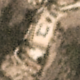

In [8]:
flat_image = df['data'][0]
image_array = flat_image_to_array(flat_image)
image = Image.fromarray(image_array)  # convert to PIL
image